## Import data

In [1]:
import pandas as pd
import numpy as np
title= pd.read_csv('Title_Defect_Dataset.csv')
title.head()

,Property_ID,StatusOwnerOccupiedFlag,TaxAssessedValueTotal,TaxAssessedImprovementsPerc,TaxMarketValueTotal,TaxMarketImprovementsPerc,AreaBuilding,BedroomsCount,StoriesCount,DeckFlag,...,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_PERC_MForeclosure,X_PERC_MDerogatory,X_PERC_MBankruptcy,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
0,244558691,NaN,18500.0,0.0,18450.0,NaN,1716,4,2.0,0.0,...,11.0,11.0,0.0,11.0,11.0,11.0,0.0,287.0,727.0,817.0
1,168532803,1.0,110000.0,90.0,183333.0,NaN,1192,3,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
2,170243135,1.0,190000.0,81.0,316667.0,NaN,3484,3,2.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
3,50276190,1.0,191000.0,91.0,318333.0,NaN,2400,4,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
4,38057038,1.0,110000.0,75.0,183333.0,NaN,1200,3,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0


In [2]:
data = title[['StatusOwnerOccupiedFlag', 'TaxAssessedValueTotal',
       'TaxMarketValueTotal', 'dr_Title_Defect_Ind', 'dr_MktValueToIncome',
       'dr_Condo_Ind', 'dr_Ownership_Period', 'dr_House_Age',
       'dr_Value_Change', 'E_MEDHHINC', 'X_PERC_CDPD60', 'X_PERC_CForeclosure',
       'X_PERC_CDerogatory', 'X_PERC_CBankruptcy', 'X_PERC_MDPD60','X_PERC_MDerogatory', 'X_PERC_MBankruptcy',
       'X_Bankruptcy_Index', 'X_Risk_Score', 'X_Vantage_Score']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500250 entries, 0 to 500249
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   StatusOwnerOccupiedFlag  334401 non-null  float64
 1   TaxAssessedValueTotal    500173 non-null  float64
 2   TaxMarketValueTotal      500173 non-null  float64
 3   dr_Title_Defect_Ind      500250 non-null  int64  
 4   dr_MktValueToIncome      496926 non-null  float64
 5   dr_Condo_Ind             500250 non-null  int64  
 6   dr_Ownership_Period      361899 non-null  float64
 7   dr_House_Age             447048 non-null  float64
 8   dr_Value_Change          500250 non-null  object 
 9   E_MEDHHINC               496998 non-null  float64
 10  X_PERC_CDPD60            454631 non-null  float64
 11  X_PERC_CForeclosure      454631 non-null  float64
 12  X_PERC_CDerogatory       454631 non-null  float64
 13  X_PERC_CBankruptcy       454631 non-null  float64
 14  X_PE

In [3]:
data = data.replace(to_replace=['INC', 'DEC', 'NC'],
           value= [1,-1,0])

In [4]:
import pandas as pd
import sklearn.preprocessing

trainingData = data.iloc[:, :].values
data_1 = data.iloc[:, :].values


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# return the col# that has NaN values:
index=[]
for m in range(len(list(data))):
    if data.iloc[:, m].isna().sum() != 0:
        index.append(m)

#impute
for i in range(20):
    imputer = imputer.fit(trainingData[:, i:(i+1)])
    data_1[:, i:(i+1)] = imputer.transform(data_1[:, i:(i+1)])
    
for m in range(20):   
    data_1 = pd.DataFrame(data_1).rename(columns={m: list(data)[m]})

revised_data = pd.DataFrame(data_1)
revised_data

,StatusOwnerOccupiedFlag,TaxAssessedValueTotal,TaxMarketValueTotal,dr_Title_Defect_Ind,dr_MktValueToIncome,dr_Condo_Ind,dr_Ownership_Period,dr_House_Age,dr_Value_Change,E_MEDHHINC,X_PERC_CDPD60,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_PERC_MDerogatory,X_PERC_MBankruptcy,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
0,1.0,18500.0,18450.0,0.0,0.22,0.0,0.00000,118.0,1.0,83121.0,11.0,11.0,11.0,0.0,11.0,11.0,0.0,287.0,727.0,817.0
1,1.0,110000.0,183333.0,0.0,2.30,0.0,10.41382,33.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,3.0,0.0,295.0,744.0,825.0
2,1.0,190000.0,316667.0,0.0,3.98,0.0,19.00000,18.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,3.0,0.0,295.0,744.0,825.0
3,1.0,191000.0,318333.0,0.0,4.00,0.0,0.00000,39.0,-1.0,79652.0,19.0,0.0,16.0,0.0,3.0,3.0,0.0,295.0,744.0,825.0
4,1.0,110000.0,183333.0,0.0,2.30,0.0,14.00000,12.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,3.0,0.0,295.0,744.0,825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500245,1.0,210000.0,210000.0,0.0,3.48,0.0,0.00000,138.0,0.0,60400.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,284.0,781.0,852.0
500246,1.0,230000.0,230000.0,0.0,3.81,0.0,10.41382,46.0,0.0,60400.0,12.0,0.0,12.0,12.0,0.0,0.0,0.0,296.0,760.0,860.0
500247,1.0,210000.0,210000.0,0.0,3.48,0.0,17.00000,42.0,0.0,60400.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,283.0,745.0,818.0
500248,1.0,85000.0,85000.0,0.0,1.41,0.0,15.00000,66.0,0.0,60400.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,298.0,761.0,825.0


## Data Cleaning

In [3]:
#Replacing INC, DEC, NC with integers
data = data.replace(to_replace=['INC', 'DEC', 'NC'],
           value= [1,-1,0])

In [50]:
import pandas as pd
import sklearn.preprocessing

trainingData = data.iloc[:, :].values
data_1 = data.iloc[:, :].values


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# return the col# that has NaN values:
index=[]
for m in range(len(list(data))):
    if data.iloc[:, m].isna().sum() != 0:
        index.append(m)

#impute
for i in range(17):
    imputer = imputer.fit(trainingData[:, i:(i+1)])
    data_1[:, i:(i+1)] = imputer.transform(data_1[:, i:(i+1)])
    
for m in range(17):   
    data_1 = pd.DataFrame(data_1).rename(columns={m: list(data)[m]})

revised_data = pd.DataFrame(data_1)
revised_data

,Property_ID,StatusOwnerOccupiedFlag,TaxAssessedValueTotal,TaxAssessedImprovementsPerc,TaxMarketValueTotal,TaxMarketImprovementsPerc,AreaBuilding,BedroomsCount,StoriesCount,DeckFlag,...,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_PERC_MForeclosure,X_PERC_MDerogatory,X_PERC_MBankruptcy,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
0,244558691.0,1.0,18500.0,0.0,18450.0,78.829965,1716.0,4.0,2.0,0.0,...,11.0,11.0,0.0,11.0,11.0,11.0,0.0,287.0,727.0,817.0
1,168532803.0,1.0,110000.0,90.0,183333.0,78.829965,1192.0,3.0,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
2,170243135.0,1.0,190000.0,81.0,316667.0,78.829965,3484.0,3.0,2.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
3,50276190.0,1.0,191000.0,91.0,318333.0,78.829965,2400.0,4.0,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
4,38057038.0,1.0,110000.0,75.0,183333.0,78.829965,1200.0,3.0,1.0,0.0,...,0.0,16.0,0.0,3.0,0.0,3.0,0.0,295.0,744.0,825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500245,224706974.0,1.0,210000.0,87.0,210000.0,87.000000,1994.0,3.0,2.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,284.0,781.0,852.0
500246,168991802.0,1.0,230000.0,72.0,230000.0,72.000000,1408.0,4.0,1.0,0.0,...,0.0,12.0,12.0,0.0,0.0,0.0,0.0,296.0,760.0,860.0
500247,2227425.0,1.0,210000.0,86.0,210000.0,86.000000,1488.0,3.0,1.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,283.0,745.0,818.0
500248,12061426.0,1.0,85000.0,73.0,85000.0,73.000000,1632.0,3.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,298.0,761.0,825.0


## Feature Selection

Lasso Method

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
X = revised_data.loc[:, revised_data.columns != 'dr_Title_Defect_Ind']
y = revised_data['dr_Title_Defect_Ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
sel_ = SelectFromModel(Lasso(alpha=0))
sel_.fit(scaler.transform(X_train), y_train)
sel_.get_support()

/Users/holly/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_from_model.py:224: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator_.fit(X, y, **fit_params)
/Users/holly/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/holly/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.1809175554133, tolerance: 0.13381926665902352
  positive)


array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True])

In [8]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 19
selected features: 16
features with coefficients shrank to zero: 1


In [9]:
selected_feat

Index(['TaxAssessedValueTotal', 'TaxMarketValueTotal', 'dr_MktValueToIncome',
       'dr_Condo_Ind', 'dr_Ownership_Period', 'dr_House_Age',
       'dr_Value_Change', 'E_MEDHHINC', 'X_PERC_CDPD60', 'X_PERC_CForeclosure',
       'X_PERC_CDerogatory', 'X_PERC_CBankruptcy', 'X_PERC_MDPD60',
       'X_Bankruptcy_Index', 'X_Risk_Score', 'X_Vantage_Score'],
      dtype='object')

## Visualization

In [11]:
happy = revised_data[['dr_Title_Defect_Ind', 'TaxAssessedValueTotal', 'TaxMarketValueTotal', 'dr_MktValueToIncome',
       'dr_Condo_Ind', 'dr_Ownership_Period', 'dr_House_Age',
       'dr_Value_Change', 'E_MEDHHINC', 'X_PERC_CDPD60', 'X_PERC_CForeclosure',
       'X_PERC_CDerogatory', 'X_PERC_CBankruptcy', 'X_PERC_MDPD60', 'X_Bankruptcy_Index',
       'X_Risk_Score', 'X_Vantage_Score']]
happy.head()

,dr_Title_Defect_Ind,TaxAssessedValueTotal,TaxMarketValueTotal,dr_MktValueToIncome,dr_Condo_Ind,dr_Ownership_Period,dr_House_Age,dr_Value_Change,E_MEDHHINC,X_PERC_CDPD60,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
0,0.0,18500.0,18450.0,0.22,0.0,0.00000,118.0,1.0,83121.0,11.0,11.0,11.0,0.0,11.0,287.0,727.0,817.0
1,0.0,110000.0,183333.0,2.30,0.0,10.41382,33.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
2,0.0,190000.0,316667.0,3.98,0.0,19.00000,18.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
3,0.0,191000.0,318333.0,4.00,0.0,0.00000,39.0,-1.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
4,0.0,110000.0,183333.0,2.30,0.0,14.00000,12.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0


In [12]:
corr = happy.corr()
corr

,dr_Title_Defect_Ind,TaxAssessedValueTotal,TaxMarketValueTotal,dr_MktValueToIncome,dr_Condo_Ind,dr_Ownership_Period,dr_House_Age,dr_Value_Change,E_MEDHHINC,X_PERC_CDPD60,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
dr_Title_Defect_Ind,1.000000,0.005967,0.004902,0.016234,0.007907,-0.022053,0.035528,-0.015887,-0.044060,0.041087,0.000242,0.040505,-0.002330,0.001561,-0.032922,-0.051334,-0.050301
TaxAssessedValueTotal,0.005967,1.000000,0.978448,0.862798,0.011182,-0.002102,-0.138703,0.031987,0.156608,-0.129555,-0.010463,-0.121432,-0.035804,-0.026683,0.113576,0.143004,0.157055
TaxMarketValueTotal,0.004902,0.978448,1.000000,0.876592,0.011564,-0.004164,-0.142404,0.024936,0.146801,-0.129733,-0.010295,-0.121956,-0.030277,-0.025585,0.114178,0.144537,0.156059
dr_MktValueToIncome,0.016234,0.862798,0.876592,1.000000,0.020363,-0.004109,-0.074225,0.013763,-0.003892,-0.058456,-0.006117,-0.054659,-0.017971,-0.014727,0.055458,0.059031,0.063699
dr_Condo_Ind,0.007907,0.011182,0.011564,0.020363,1.000000,-0.009540,-0.003011,-0.004881,-0.026608,0.001237,-0.002881,-0.000677,0.001281,-0.009300,-0.003557,-0.012200,-0.016347
dr_Ownership_Period,-0.022053,-0.002102,-0.004164,-0.004109,-0.009540,1.000000,-0.024224,-0.163043,0.007327,-0.014882,0.001493,-0.012692,-0.003786,0.002107,0.017354,0.024854,0.024462
dr_House_Age,0.035528,-0.138703,-0.142404,-0.074225,-0.003011,-0.024224,1.000000,-0.050488,-0.363760,0.348639,0.019861,0.334178,0.032589,0.026691,-0.270236,-0.433092,-0.456730
dr_Value_Change,-0.015887,0.031987,0.024936,0.013763,-0.004881,-0.163043,-0.050488,1.000000,0.055598,-0.059719,-0.004116,-0.057238,-0.017486,-0.003274,0.041281,0.062725,0.067176
E_MEDHHINC,-0.044060,0.156608,0.146801,-0.003892,-0.026608,0.007327,-0.363760,0.055598,1.000000,-0.475065,-0.030103,-0.454199,-0.061454,-0.060011,0.383876,0.560522,0.582995
X_PERC_CDPD60,0.041087,-0.129555,-0.129733,-0.058456,0.001237,-0.014882,0.348639,-0.059719,-0.475065,1.000000,0.100018,0.922661,0.226513,0.226838,-0.719972,-0.866546,-0.834639


In [14]:
insurance = revised_data[['dr_Title_Defect_Ind', 'X_Risk_Score', 'X_Vantage_Score', 'X_PERC_CDPD60', 'X_PERC_CDerogatory', 'dr_Ownership_Period', 'dr_House_Age', 'X_Bankruptcy_Index', 'dr_Value_Change', 'E_MEDHHINC', 'TaxMarketValueTotal']]
insurance.head()

,dr_Title_Defect_Ind,X_Risk_Score,X_Vantage_Score,X_PERC_CDPD60,X_PERC_CDerogatory,dr_Ownership_Period,dr_House_Age,X_Bankruptcy_Index,dr_Value_Change,E_MEDHHINC,TaxMarketValueTotal
0,0.0,727.0,817.0,11.0,11.0,0.00000,118.0,287.0,1.0,83121.0,18450.0
1,0.0,744.0,825.0,19.0,16.0,10.41382,33.0,295.0,0.0,79652.0,183333.0
2,0.0,744.0,825.0,19.0,16.0,19.00000,18.0,295.0,0.0,79652.0,316667.0
3,0.0,744.0,825.0,19.0,16.0,0.00000,39.0,295.0,-1.0,79652.0,318333.0
4,0.0,744.0,825.0,19.0,16.0,14.00000,12.0,295.0,0.0,79652.0,183333.0


In [15]:
corr = insurance.corr()
corr

,dr_Title_Defect_Ind,X_Risk_Score,X_Vantage_Score,X_PERC_CDPD60,X_PERC_CDerogatory,dr_Ownership_Period,dr_House_Age,X_Bankruptcy_Index,dr_Value_Change,E_MEDHHINC,TaxMarketValueTotal
dr_Title_Defect_Ind,1.000000,-0.051334,-0.050301,0.041087,0.040505,-0.022053,0.035528,-0.032922,-0.015887,-0.044060,0.004902
X_Risk_Score,-0.051334,1.000000,0.979051,-0.866546,-0.811573,0.024854,-0.433092,0.765879,0.062725,0.560522,0.144537
X_Vantage_Score,-0.050301,0.979051,1.000000,-0.834639,-0.784880,0.024462,-0.456730,0.728474,0.067176,0.582995,0.156059
X_PERC_CDPD60,0.041087,-0.866546,-0.834639,1.000000,0.922661,-0.014882,0.348639,-0.719972,-0.059719,-0.475065,-0.129733
X_PERC_CDerogatory,0.040505,-0.811573,-0.784880,0.922661,1.000000,-0.012692,0.334178,-0.679575,-0.057238,-0.454199,-0.121956
dr_Ownership_Period,-0.022053,0.024854,0.024462,-0.014882,-0.012692,1.000000,-0.024224,0.017354,-0.163043,0.007327,-0.004164
dr_House_Age,0.035528,-0.433092,-0.456730,0.348639,0.334178,-0.024224,1.000000,-0.270236,-0.050488,-0.363760,-0.142404
X_Bankruptcy_Index,-0.032922,0.765879,0.728474,-0.719972,-0.679575,0.017354,-0.270236,1.000000,0.041281,0.383876,0.114178
dr_Value_Change,-0.015887,0.062725,0.067176,-0.059719,-0.057238,-0.163043,-0.050488,0.041281,1.000000,0.055598,0.024936
E_MEDHHINC,-0.044060,0.560522,0.582995,-0.475065,-0.454199,0.007327,-0.363760,0.383876,0.055598,1.000000,0.146801


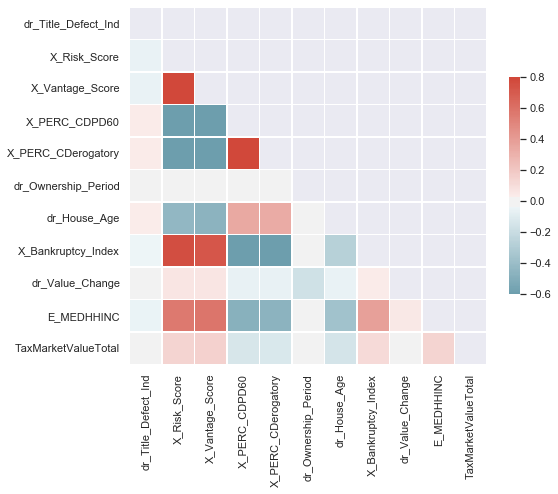

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 8))

cmap = sns.diverging_palette(220, 15, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Split Dataset

In [5]:
#Create x and y for training
y = revised_data['dr_Title_Defect_Ind']
X = revised_data[['TaxAssessedValueTotal', 'TaxMarketValueTotal', 'dr_MktValueToIncome',
       'dr_Condo_Ind', 'dr_Ownership_Period', 'dr_House_Age',
       'dr_Value_Change', 'E_MEDHHINC', 'X_PERC_CDPD60', 'X_PERC_CForeclosure',
       'X_PERC_CDerogatory', 'X_PERC_CBankruptcy', 'X_PERC_MDPD60',
       'X_Bankruptcy_Index', 'X_Risk_Score', 'X_Vantage_Score']]

X.head()

,TaxAssessedValueTotal,TaxMarketValueTotal,dr_MktValueToIncome,dr_Condo_Ind,dr_Ownership_Period,dr_House_Age,dr_Value_Change,E_MEDHHINC,X_PERC_CDPD60,X_PERC_CForeclosure,X_PERC_CDerogatory,X_PERC_CBankruptcy,X_PERC_MDPD60,X_Bankruptcy_Index,X_Risk_Score,X_Vantage_Score
0,18500.0,18450.0,0.22,0.0,0.00000,118.0,1.0,83121.0,11.0,11.0,11.0,0.0,11.0,287.0,727.0,817.0
1,110000.0,183333.0,2.30,0.0,10.41382,33.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
2,190000.0,316667.0,3.98,0.0,19.00000,18.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
3,191000.0,318333.0,4.00,0.0,0.00000,39.0,-1.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0
4,110000.0,183333.0,2.30,0.0,14.00000,12.0,0.0,79652.0,19.0,0.0,16.0,0.0,3.0,295.0,744.0,825.0


In [6]:
#Train test split and gridserach to tune model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## Balance the Dataset 

In [9]:
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_smt)

StandardScaler()

In [11]:
X_train_smt.info()
X_test_smt.info()
y_train_smt

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743526 entries, 44400 to 121958
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TaxAssessedValueTotal  743526 non-null  float64
 1   TaxMarketValueTotal    743526 non-null  float64
 2   dr_MktValueToIncome    743526 non-null  float64
 3   dr_Condo_Ind           743526 non-null  float64
 4   dr_Ownership_Period    743526 non-null  float64
 5   dr_House_Age           743526 non-null  float64
 6   dr_Value_Change        743526 non-null  float64
 7   E_MEDHHINC             743526 non-null  float64
 8   X_PERC_CDPD60          743526 non-null  float64
 9   X_PERC_CForeclosure    743526 non-null  float64
 10  X_PERC_CDerogatory     743526 non-null  float64
 11  X_PERC_CBankruptcy     743526 non-null  float64
 12  X_PERC_MDPD60          743526 non-null  float64
 13  X_Bankruptcy_Index     743526 non-null  float64
 14  X_Risk_Score           743526 no

44400     0.0
832917    1.0
2815      0.0
280652    0.0
153038    0.0
         ... 
259178    0.0
365838    0.0
131932    0.0
671155    1.0
121958    0.0
Name: dr_Title_Defect_Ind, Length: 743526, dtype: float64

##  Logistic Regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
# model
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_smt,y_train_smt)
lg_pred_i=logistic_regression.predict(X_test_smt)
lg_pred_i

array([0., 0., 1., ..., 0., 1., 1.])

In [30]:
# Evaluation later

print ("Logistic Confusion Matrix : \n", confusion_matrix(y_test_smt, lg_pred_i),"\n") 
print ("Logistic Accuracy : ", accuracy_score(y_test_smt, lg_pred_i),"\n") 
print ("Logistic RMSE : ", sqrt(mean_squared_error(y_test_smt, lg_pred_i)),"\n")
print ("Logistic Classification : \n", classification_report(y_test_smt, lg_pred_i))
print ("Logistic ROC_AUC : ",roc_auc_score(y_test_smt, lg_pred_i))

Logistic Confusion Matrix : 
 [[89653 34288]
 [51009 72930]] 

Logistic Accuracy :  0.6558939809585284 

Logistic RMSE :  0.5866055054646792 

Logistic Classification : 
               precision    recall  f1-score   support

         0.0       0.64      0.72      0.68    123941
         1.0       0.68      0.59      0.63    123939

    accuracy                           0.66    247880
   macro avg       0.66      0.66      0.65    247880
weighted avg       0.66      0.66      0.65    247880

Logistic ROC_AUC :  0.6558934366725553


In [31]:
logistic_regression.predict_proba(X_test_smt)[:,1].tolist()

[0.339310237735539,
 0.283820077099324,
 0.8169529751439856,
 0.47272873503197815,
 0.2847146115427242,
 0.814098835864595,
 0.7066068894651827,
 0.45576117140572386,
 0.23210836812937918,
 0.19117482701364794,
 0.3983674409940637,
 0.6809225591707926,
 0.6315902939847137,
 0.47416226974292763,
 0.4266187588917609,
 0.3691435276155419,
 0.4718053710464631,
 0.6279052268679828,
 0.30490697335434636,
 0.37170685823009597,
 0.49254993212552856,
 0.6011485939460505,
 0.43763845961958225,
 0.3783081297983851,
 0.8171010539693809,
 0.4058629949353649,
 0.28437155388391017,
 0.27119555630912867,
 0.2720901467632259,
 0.32050825970372343,
 0.39019421077627314,
 0.4104099041033146,
 0.20609244466611126,
 0.46261243222098813,
 0.3515082519040795,
 0.43992730186339224,
 0.7188786877567852,
 0.2616111334326717,
 0.42818993991341,
 0.2647058451127306,
 0.8126585467006052,
 0.5225573609553131,
 0.3886681997699118,
 0.7061527595120632,
 0.6118044575429714,
 0.6107835565766853,
 0.7821923837268616,
 0

## Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_smt,y_train_smt)
dtree_pred_i = dtree.predict(X_test_smt)

In [33]:
# Evaluation 
from sklearn.metrics import confusion_matrix
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

print ("Decision Tree Confusion Matrix : \n", confusion_matrix(y_test_smt, dtree_pred_i),"\n" )
print ("Decision Tree Accuracy : ", accuracy_score(y_test_smt, dtree_pred_i),"\n")
print ("Decision Tree RMSE : ", sqrt(mean_squared_error(y_test_smt, dtree_pred_i)),"\n")
print ("Decision Tree Classification: \n", classification_report(y_test_smt, dtree_pred_i))
print ("Decision Tree ROC_AUC: ",roc_auc_score(y_test_smt, dtree_pred_i))

Decision Tree Confusion Matrix : 
 [[123003    938]
 [   603 123336]] 

Decision Tree Accuracy :  0.9937832822333387 

Decision Tree RMSE :  0.07884616519946476 

Decision Tree Classification: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    123941
         1.0       0.99      1.00      0.99    123939

    accuracy                           0.99    247880
   macro avg       0.99      0.99      0.99    247880
weighted avg       0.99      0.99      0.99    247880

Decision Tree ROC_AUC:  0.9937832931370844


In [34]:
dtree.predict_proba(X_test_smt)[:,1].tolist()

[0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_smt,y_train_smt)
rfc_pred = rfc.predict(X_test_smt)

In [ ]:
# Evaluation
print ("Random Forest Confusion Matrix : \n", confusion_matrix(y_test_smt, rfc_pred),"\n" )
print ("Random Forest Accuracy : ", accuracy_score(y_test_smt, rfc_pred),"\n")
print ("Random Forest RMSE : ", sqrt(mean_squared_error(y_test_smt, rfc_pred)),"\n")
print ("Random Forest Classification: \n", classification_report(y_test_smt, rfc_pred))
print ("Random Forest ROC_AUC: ",roc_auc_score(y_test_smt, rfc_pred))

In [ ]:
set(rfc.predict_proba(X_test_smt)[:,1].tolist())

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_smt,y_train_smt)
knn_pred = knn.predict(X_test_smt)

In [ ]:
print ("KNN Confusion Matrix : \n", confusion_matrix(y_test_smt, knn_pred),"\n" )
print ("KNN Accuracy : ", accuracy_score(y_test_smt, knn_pred),"\n")
print ("KNN RMSE : ", sqrt(mean_squared_error(y_test_smt, knn_pred)),"\n")
print ("KNN Classification: \n", classification_report(y_test_smt, knn_pred))
print ("KNN ROC_AUC: ",roc_auc_score(y_test_smt, knn_pred))

In [ ]:
set(knn.predict_proba(X_train_smt)[:,1].tolist())

## XGBoost 

In [21]:
import get_ipython
get_ipython().system('pip install xgboost')
import xgboost as xgb
import re
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import sqrt
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'get_ipython'

In [ ]:
#Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

model = XGBClassifier(n_estimators = 100,scale_pos_weight= 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print ("Boost Confusion Matrix : \n", confusion_matrix(y_test, y_pred),"\n" )
print ("Boost Accuracy : ", accuracy_score(y_test, y_pred),"\n")
print ("Boost RMSE : ", sqrt(mean_squared_error(y_test, y_pred)),"\n")
print ("Boost Classification: \n", classification_report(y_test, y_pred))
print ("Boost ROC_AUC: ",roc_auc_score(y_test, y_pred))